In [2]:
%load_ext autoreload
%autoreload 2

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
# Define your functions in organised individual python files. Don't throw them randomly in the notebook

## Import image processing modules
import os
import numpy as np
from PIL import Image

from utils.misc import load_data, load_data_AR

## Import Algorithms
from algs import NmfL2Estimator, NmfHyperEstimator

In [4]:
# Load ORL dataset.
X, Y = load_data(root='data/ORL', reduce=2)
print('ORL dataset: X.shape = {}, Y.shape = {}'.format(X.shape, Y.shape))

ORL dataset: X.shape = (2576, 400), Y.shape = (400,)


## NMF l2 test

In [57]:
k = 2
num_samples = 1
d, n = X.shape

# nmf_l2 = NmfL2Estimator(k, max_iter=1000, verbose=1)

In [58]:
@interact(n=widgets.IntSlider(min=1, max=400, step=1, value=400),
          d=widgets.IntSlider(min=1, max=2576, step=1, value=2576), 
          k=widgets.IntSlider(min=1, max=500, step=1, value=500),
          max_iter=widgets.IntSlider(min=0, max=1000, step=10, value=1000), 
          verbose=widgets.IntSlider(min=0, max=2, step=1, value=1),
          continuous_update=False)
def fit(n, d, k, max_iter, verbose):
    nmf_l2 = NmfL2Estimator(k, max_iter=max_iter, verbose=verbose)
    nmf_l2.fit(X[:d, :n])

interactive(children=(IntSlider(value=400, description='n', max=400, min=1), IntSlider(value=2576, description…

### Test by checking reconstruction

In [59]:
X, Y = load_data(root='data/ORL', reduce=3)
print('ORL dataset: X.shape = {}, Y.shape = {}'.format(X.shape, Y.shape))

k = 500
max_iter = 1000
verbose = 0

nmf_l2 = NmfL2Estimator(k, max_iter=max_iter, verbose=verbose)
nmf_l2.fit(X)
D = nmf_l2.D
R = nmf_l2.R
X_pred = D @ R

ORL dataset: X.shape = (1110, 400), Y.shape = (400,)


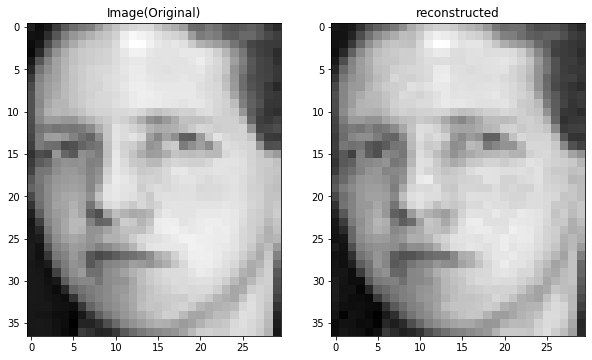

In [60]:
# Plot result.
import matplotlib.pyplot as plt
img_size = [i//3 for i in (92, 112)] # ORL
ind = 2 # index of demo image.
img = X[:, ind]
img_pred = X_pred[:, ind]

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.imshow(img.reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(Original)')
plt.subplot(122)
plt.imshow(img_pred.reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('reconstructed')
plt.show()

## NMF hyper test

In [5]:
k = 2
num_samples = 1
d, n = X.shape

In [70]:
@interact(n=widgets.IntSlider(min=1, max=400, step=1, value=400),
          d=widgets.IntSlider(min=1, max=2576, step=1, value=2576), 
          k=widgets.IntSlider(min=1, max=500, step=1, value=500),
          max_iter=widgets.IntSlider(min=0, max=1000, step=10, value=1000), 
          verbose=widgets.IntSlider(min=0, max=2, step=1, value=1),
          continuous_update=False)
def fit(n, d, k, max_iter, verbose):
    nmf_hyper = NmfHyperEstimator(k=k, max_iter=max_iter, verbose=verbose)
    nmf_hyper.fit(X[:d, :n])

interactive(children=(IntSlider(value=400, description='n', max=400, min=1), IntSlider(value=2576, description…

### Test by checking reconstruction

In [ ]:
X, Y = load_data(root='data/ORL', reduce=3)
print('ORL dataset: X.shape = {}, Y.shape = {}'.format(X.shape, Y.shape))

k = 500
max_iter = 1000
verbose = 0

nmf_hyper = NmfHyperEstimator(k=k, max_iter=max_iter, verbose=verbose)
nmf_hyper.fit(X)
D = nmf_hyper.D
R = nmf_hyper.R
X_pred = D @ R

ORL dataset: X.shape = (1110, 400), Y.shape = (400,)


In [ ]:
# Plot result.
import matplotlib.pyplot as plt
img_size = [i//3 for i in (92, 112)] # ORL
ind = 2 # index of demo image.
img = X[:, ind]
img_pred = X_pred[:, ind]

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.imshow(img.reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(Original)')
plt.subplot(122)
plt.imshow(img_pred.reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('reconstructed')
plt.show()